### Copyright 2022 Edward Späth, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md

## Data structure min priority queue

## Data structure for storing keys with their respective priorities

In [1]:
class Node:
    def __init__(self, name_input, prio_input):
        self.name = name_input
        self.prio = prio_input

## Storage for elements of min priority queue

In [2]:
elements = []
heapsize = 0

## Function to reset min priority queue

In [3]:
def reset_pq():
    global elements, heapsize
    elements, heapsize = [], 0

## Helper functions for easier access to children/parents of a given element in heap

In [4]:
def parent(i):
    return (i-1)//2 # '//' means division with floor function (round down)

def left(i):
    return 2*i+1

def right(i):
    return 2*i+2

## Implementation of a min priority queue

In [5]:
def insert_multiple(elements_to_insert=[]):
    for name_input, prio_input in elements_to_insert:
        insert_key(name_input, prio_input)
        
def insert_key(name_input, prio_input):
        global elements, heapsize
        name_already_exists = False
        for element in elements:
            if element.name == name_input:
                name_already_exists = True
        if not name_already_exists:
            elements.append(Node(name_input, float('inf'))) # float('inf') = positive infinity
            heap_decrease_key(heapsize, prio_input)
            heapsize += 1   
        else:
            print("\nThere is already an element named", name_input, "Please choose a different name.")
            
def heap_decrease_key(i, prio_input):
    global elements 
    if prio_input >= elements[i].prio:
        print("\nERROR: New priority must be smaller than old priority")
        return       
    elements[i].prio = prio_input   
    while i > 0 and elements[parent(i)].prio > elements[i].prio:
        elements[i], elements[parent(i)] = elements[parent(i)], elements[i]
        i = parent(i)
        
def extract_min():
    global elements, heapsize
    if heapsize < 1:
        print("\nERROR: Underflow. Cannot extract from an empty priority queue")
        return      
    min_element = elements[0]
    heapsize -= 1
    elements[0], elements[heapsize] = elements[heapsize], elements[0] # Swaps first element and last element to delete the previous first and bubble down the previous last
    elements = elements[:heapsize] # Deletes last element
    min_heapify(0)   
    print("\nElement", min_element.name, "with priority", min_element.prio, "has been extracted")
        
def min_heapify(i):
    global elements, heapsize
    l = left(i)
    r = right(i)   
    if l < heapsize and elements[l].prio < elements[i].prio:
        minimum = l
    else:
        minimum = i       
    if r < heapsize and elements[r].prio < elements[minimum].prio:
        minimum = r   
    if minimum != i:
        elements[i], elements[minimum] = elements[minimum], elements[i]
        min_heapify(minimum)
    
def reduce_priority(name_to_be_searched, prio_input):
    global elements   
    key_found = False  
    for index, element in enumerate(elements):
        if element.name == name_to_be_searched:
            key_found = True
            at_index = index
            break          
    if not key_found:      
        print("\nERROR: Element whose priority you want to decrease does not exist")
        return     
    if elements[at_index].prio <= prio_input: 
        print("\nERROR: New priority of", elements[at_index].name, 
              "is not lower than old priority! Priority may only ever decrease. Priority stays unchanged")
        return
    heap_decrease_key(at_index, prio_input)
    
def print_pq(show_name=True, show_prio=True):
    if heapsize < 1:
        print("\nThe current priority pueue is empty! Nothing to print")
        return 
    if not show_name and not show_prio:
        print("\nYou have to atleast print the names or the priorities")
    printarray = [] 
    for element in elements:
        if show_name and show_prio:
            printarray.append((element.name,element.prio))
        elif show_name:
            printarray.append(element.name)
        else:
            printarray.append(element.prio)
    print("\nThe current priority queue of size", heapsize, "is: --> printing names:",
           show_name, "- printing priorities:", show_prio)  
    print(printarray)

## Example with explanations on how to use functions

In [6]:
# This list saves the elements you want to enqueue at once. The name of the key is written in Ticks ('') on the left side of each pair
# The corresponding priority is written on the right side of each pair
# This example initializes the priority queue with a key named 'A' with priority 4, another key named 'B' with priority 2, etc
# Note that this is a min priority queue. The lower the number representing priority, the more important the element is

# If you dont want to initialize anything, leave the array empty --> "elements_to_insert = []"
# Alternatively remove elements_to_insert from the insert_multiple-function's parameters --> "insert_multiple()"

elements_to_insert = [('A', 4), ('B', 2), ('C', 6), ('D', 1)]

insert_multiple(elements_to_insert)

# Prints the current contents of the priority queue aswell as size.
# The boolean values allow you to select what you want to be printed.
# In the example below both name and priority of each element will be printed
# Calling print_pq without parameters is the same as both booleans being True
print_pq(show_name = True, show_prio = True)

# If you only want the names to be printed, have "show_name = True" and "show_prio = False":
# Or vice versa
print_pq(show_name = True, show_prio = False)

# Extracts the element with the lowest priority and prints what its data was
extract_min()

print_pq(show_name = True, show_prio = True)

# Same idea as with insert_multiple but only one element at a time
insert_key('F', 3)

print_pq(show_name = True, show_prio = True)

# Instead of creating a new unique name, give the name of an existing element whose priority you want to change (give new priority as right value)
reduce_priority('F', 2)

print_pq(show_name = False, show_prio = True)

reset_pq() # Resets contents of priority queue (ignore)


The current priority queue of size 4 is: --> printing names: True - printing priorities: True
[('D', 1), ('B', 2), ('C', 6), ('A', 4)]

The current priority queue of size 4 is: --> printing names: True - printing priorities: False
['D', 'B', 'C', 'A']

Element D with priority 1 has been extracted

The current priority queue of size 3 is: --> printing names: True - printing priorities: True
[('B', 2), ('A', 4), ('C', 6)]

The current priority queue of size 4 is: --> printing names: True - printing priorities: True
[('B', 2), ('F', 3), ('C', 6), ('A', 4)]

The current priority queue of size 4 is: --> printing names: False - printing priorities: True
[2, 2, 6, 4]


## Your tests go here...

In [7]:
elements_to_insert = [('A', 4), ('B', 2), ('C', 6), ('D', 1)]

insert_multiple(elements_to_insert)

print_pq(show_name = True, show_prio = True)

reduce_priority('C', 3)

print_pq(show_name = True, show_prio = True)

reset_pq() # Resets contents of priority queue (ignore)


The current priority queue of size 4 is: --> printing names: True - printing priorities: True
[('D', 1), ('B', 2), ('C', 6), ('A', 4)]

The current priority queue of size 4 is: --> printing names: True - printing priorities: True
[('D', 1), ('B', 2), ('C', 3), ('A', 4)]


## Create your min priority queue. The result will be visualized as a min-heap at the very bottom

In [8]:
elements_to_insert = [('A', 4), ('B', 2), ('C', 6), ('D', 1)]

insert_multiple(elements_to_insert)

insert_key('F', 3)

reduce_priority('A', 3)

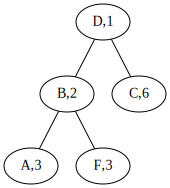

In [9]:
import graphviz
# In case that the rendering inside GitHub will break again, just like described in this GitHub issue
# https://github.com/xflr6/graphviz/issues/182 , then un-comment the line below for a potential fix.
# graphviz.set_jupyter_format('png')
dot = graphviz.Graph()
for index in range(len(elements)):       
    if left(index) < heapsize:    
        start = elements[index].name + "," + str(elements[index].prio) # Concatinating the Name of each Element together with its Priority into a single string
        destination = elements[left(index)].name + "," + str(elements[left(index)].prio)
        dot.edge(start,destination)
    if right(index) < heapsize:
        start = elements[index].name + "," + str(elements[index].prio)
        destination = elements[right(index)].name + "," + str(elements[right(index)].prio)
        dot.edge(start,destination)
display(dot)